# Disclaimer : This Jupyter notebook is created by **Christopher Lin, Kristy Yu, and Sonal Bimbra** for BAIT 508 Final Project.

## Please request the consent before you use any information in this project. Thank you!

some useful resource provided by professor Gene Lee.

If you are interested in the powerful tool `tweepy` and want to learn more about it, here are some resources:
- official website: https://www.tweepy.org/
- documentation: https://docs.tweepy.org/en/stable/
- the most commonly used class for tweepy is `Client`, please see its usage here: https://docs.tweepy.org/en/stable/client.html

Here is a tutorial on search query:
* https://github.com/twitterdev/getting-started-with-the-twitter-api-v2-for-academic-research/blob/main/modules/5-how-to-write-search-queries.md

# <font color='red'>[Part 1]</font> Data Collection!

We have fetched the tweets data and twitter author information before. Please save those data in the same directory.
Please check you have the files below:
- recent_post_mcdonalds lang-en_5000.json
- recent_post_kfc lang-en_5000.json
- author_data_mcd.json
- author_data_kfc.json


In [1]:
from unittest import skip
import tweepy
import nltk
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
from TwitterCollector import TwitterCollector
from datetime import datetime
import pickle
from collections import Counter
from textblob import TextBlob
from wordcloud import WordCloud
# Bearer Token
bearer_token = r"USE YOUR TOKEN"

# initialize a TwitterCollector instance
tc = TwitterCollector(bearer_token = bearer_token)

query1 = 'mcdonalds lang:en'
query2 = 'kfc lang:en'  # tweets containing 'mcdonalds' and 'kfc' 

# recent_tweets_mcd = tc.fetch_recent_tweets(query = query1  # specify the search query
#                                             , tweets_cnt = 5000  # specify the number of tweets you want to collect
#                                             , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
#                                             )
# recent_tweets_kfc = tc.fetch_recent_tweets(query = query2  # specify the search query
#                                             , tweets_cnt = 5000  # specify the number of tweets you want to collect
#                                             , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
#                                             )

In [2]:
# # This cell is to fetch author information of McDonald. Please do not run this when checking.
# if 'author_mcd_lst' in dir():
#     skip
# else: author_mcd_lst = pd.DataFrame({'id':[]})

# if 'error_mcd_lst' in dir():
#     skip
# else: error_mcd_lst = pd.DataFrame({'id':[]})

# buffer_lst = []
# buffer_error_lst = []
# df_tweets_mcd['author_id'] = df_tweets_mcd['author_id'].apply(int)
# for i in range(len(df_tweets_mcd['author_id'])):
#     if df_tweets_mcd['author_id'][i] in list(author_mcd_lst['id']): continue # test whether we have had the id
#     elif df_tweets_mcd['author_id'][i] in list(error_mcd_lst['id']): continue # test whether we have had the fake id
#     else: 
#         try:
#             author_info_ = tc.fetch_author_info(str(df_tweets_mcd['author_id'][i]))
#             buffer_lst.append(author_info_)
            
#         except tweepy.TooManyRequests: # deal with HTTP Error 409
#             print('TooManyRequests')
#             time.sleep(15*60) # Rest for 15 mins and wait for the timeframe to reset
#         except:
#             buffer_error_lst.append(df_tweets_mcd['author_id'][i])

# buffer_lst = pd.json_normalize(buffer_lst)
# buffer_error_lst = pd.json_normalize(buffer_error_lst)

# error_mcd_lst = pd.concat([error_mcd_lst, buffer_error_lst], ignore_index=True)
# author_mcd_lst = pd.concat([author_mcd_lst, buffer_lst], ignore_index=True)

# # Old version (Do not use this)
# # with open('author_data_mcd.json', 'wb') as fp:  
# #     pickle.dump(author_mcd_lst, fp)
# # with open('author_error_data_mcd.json', 'wb') as fp:  
# #     pickle.dump(error_mcd_lst, fp)

# # New version
# author_mcd_lst.to_json('author_data_mcd.json')
# error_mcd_lst.to_json('error_mcd_lst.json')

In [3]:
# # This cell is to fetch author information of KFC. Please do not run this when checking.
# if 'author_kfc_lst' in dir():
#     skip
# else: author_kfc_lst = pd.DataFrame({'id':[]})

# if 'error_kfc_lst' in dir():
#     skip
# else: error_kfc_lst = pd.DataFrame({'id':[]})

# buffer_lst = []
# buffer_error_lst = []
# df_tweets_kfc['author_id'] = df_tweets_kfc['author_id'].apply(int)
# for i in range(len(df_tweets_kfc['author_id'])):
#     if df_tweets_kfc['author_id'].apply(int)[i] in list(author_kfc_lst): continue # test whether we have had the id
#     elif df_tweets_kfc['author_id'].apply(int)[i] in list(error_kfc_lst): continue # test whether we have had the fake id
#     try:
#         author_info_ = tc.fetch_author_info(df_tweets_kfc['author_id'][i])
#         buffer_lst.append(author_info_)
        
#     except tweepy.TooManyRequests: # deal with HTTP Error 409
#         print('TooManyRequests')
#         time.sleep(15*60) # Rest for 15 mins and wait for the timeframe to reset
#     except:
#         buffer_error_lst.append(df_tweets_kfc['author_id'][i])
        
# buffer_lst = pd.json_normalize(buffer_lst)
# buffer_error_lst = pd.json_normalize(buffer_error_lst)

# error_kfc_lst = pd.concat([error_kfc_lst, buffer_error_lst], ignore_index=True)
# author_kfc_lst = pd.concat([author_kfc_lst, buffer_lst], ignore_index=True)

# # Old version (Do not use this)
# # with open('author_data_kfc.json', 'wb') as fp:  
# #     pickle.dump(author_data_kfc, fp)
# # with open('author_error_data_kfc.json', 'wb') as fp:  
# #     pickle.dump(error_kfc_lst, fp)

# # New version
# author_kfc_lst.to_json('author_data_kfc.json')
# error_kfc_lst.to_json('error_kfc_lst.json')

#### 10K Tweets with the above keywords have already been pulled and loadded into the JSON files:
For Mcdonalds: recent_post_mcdonalds lang-en_5000.json 

For KFC : recent_post_kfc lang-en_5000.json

In [4]:
with open('recent_post_mcdonalds lang-en_5000.json') as f:
    recent_tweets_mcd = json.load(f)

with open('recent_post_kfc lang-en_5000.json') as f:
    recent_tweets_kfc = json.load(f)

try:
    author_mcd_lst = pd.read_json('author_data_mcd.json')
except: print('No author_data_mcd.json file now.')

# error id that cannot be found
try:
    error_mcd_lst = pd.read_json('error_mcd_lst.json')

except: print('No error_mcd_lst.json file now.')

try:
    author_kfc_lst = pd.read_json('author_data_kfc.json')
except: print('No author_data_kfc.json file now.')

# error id that cannot be found
try:
    error_kfc_lst = pd.read_json('error_kfc_lst.json')
except: print('No error_kfc_lst.json file now.')


In [5]:
# # This cell is to fetch author information of KFC. Please do not run this when checking.
# if 'author_kfc_lst' in dir():
#     skip
# else: author_kfc_lst = pd.DataFrame({'id':[]})

# if 'error_kfc_lst' in dir():
#     skip
# else: error_kfc_lst = pd.DataFrame({'id':[]})

# buffer_lst = []
# buffer_error_lst = []
# df_tweets_kfc['author_id'] = df_tweets_kfc['author_id'].apply(int)
# for i in range(len(df_tweets_kfc['author_id'])):
#     if df_tweets_kfc['author_id'].apply(int)[i] in list(author_kfc_lst): continue # test whether we have had the id
#     elif df_tweets_kfc['author_id'].apply(int)[i] in list(error_kfc_lst): continue # test whether we have had the fake id
#     try:
#         author_info_ = tc.fetch_author_info(df_tweets_kfc['author_id'][i])
#         buffer_lst.append(author_info_)
        
#     except tweepy.TooManyRequests: # deal with HTTP Error 409
#         print('TooManyRequests')
#         time.sleep(15*60) # Rest for 15 mins and wait for the timeframe to reset
#     except:
#         buffer_error_lst.append(df_tweets_kfc['author_id'][i])
        
# buffer_lst = pd.json_normalize(buffer_lst)
# buffer_error_lst = pd.json_normalize(buffer_error_lst)

# error_kfc_lst = pd.concat([error_kfc_lst, buffer_error_lst], ignore_index=True)
# author_kfc_lst = pd.concat([author_kfc_lst, buffer_lst], ignore_index=True)

# # Old version (Do not use this)
# # with open('author_data_kfc.json', 'wb') as fp:  
# #     pickle.dump(author_data_kfc, fp)
# # with open('author_error_data_kfc.json', 'wb') as fp:  
# #     pickle.dump(error_kfc_lst, fp)

# # New version
# author_kfc_lst.to_json('author_data_kfc.json')
# error_kfc_lst.to_json('error_kfc_lst.json')

In [6]:
# Creating dataframe with the Mcdonalds and KFC tweets 
query_outline_mcd = pd.DataFrame(recent_tweets_mcd)
df_tweets_mcd = pd.DataFrame(recent_tweets_mcd['tweets'])

query_outline_kfc = pd.DataFrame(recent_tweets_kfc)
df_tweets_kfc = pd.DataFrame(recent_tweets_kfc['tweets'])

In [7]:
query_outline_mcd.head()
query_outline_kfc.head()

,collection_type,collection_timestamp,query,tweet_cnt,tweets
0,recent post,1.664756e+09,kfc lang:en,5000,"{'public_metrics': {'retweet_count': 1, 'reply..."
1,recent post,1.664756e+09,kfc lang:en,5000,"{'public_metrics': {'retweet_count': 31, 'repl..."
2,recent post,1.664756e+09,kfc lang:en,5000,"{'public_metrics': {'retweet_count': 0, 'reply..."
3,recent post,1.664756e+09,kfc lang:en,5000,"{'public_metrics': {'retweet_count': 0, 'reply..."
4,recent post,1.664756e+09,kfc lang:en,5000,"{'public_metrics': {'retweet_count': 0, 'reply..."


In [8]:
df_tweets_mcd.info()
df_tweets_kfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   text                    5000 non-null   object
 1   context_annotations     4581 non-null   object
 2   lang                    5000 non-null   object
 3   referenced_tweets       3438 non-null   object
 4   entities                4703 non-null   object
 5   author_id               5000 non-null   object
 6   public_metrics          5000 non-null   object
 7   edit_history_tweet_ids  5000 non-null   object
 8   possibly_sensitive      5000 non-null   bool  
 9   created_at              5000 non-null   object
 10  id                      5000 non-null   object
 11  source                  5000 non-null   object
 12  in_reply_to_user_id     1846 non-null   object
 13  attachments             726 non-null    object
 14  geo                     74 non-null     object
dtypes: b

## Data cleaning: Remove urls

In [9]:
# Remove 'https://' keyword from the tweets as it was being counted as the 
# top used words in the tweets and had no importance in our analysis

from urllib.parse import urlparse
#https://stackoverflow.com/a/52455972
def is_url(url):
  ''' Input string to test whether it is url (i.e. starting from https://) 
  '''
  try:
    result = urlparse(url)
    return all([result.scheme, result.netloc])
  except ValueError:
    return False

df_tweets_mcd['text'] = [' '.join(y for y in x.split() if not is_url(y)) for x in df_tweets_mcd['text']] # double for loop in list comprehension
df_tweets_kfc['text'] = [' '.join(y for y in x.split() if not is_url(y)) for x in df_tweets_kfc['text']]
# Outer for loop to iterate each 'text' value ; inner for loop to split the value from sectence to words

# this cell is revised from the website below
# https://stackoverflow.com/questions/56358888/how-to-remove-https-links-from-a-string-column-in-pandas

In [10]:
#List of unique author IDs in the data for both Mcdolnalds and KFC
print(f"Length of Mcdonal tweets Author: { len(author_mcd_lst['id'].unique()) }")
pprint(author_mcd_lst['id'].unique())
print(' ')
print(f"Length of KFC tweets Author: { len(author_kfc_lst['id'].unique())}")
pprint(author_kfc_lst['id'].unique())

Length of Mcdonal tweets Author: 4390
array([ 762078171244081152,          3193744958, 1473887326866755584, ...,
        751525666877759488, 1190035870449127424, 1013406819996164096])
 
Length of KFC tweets Author: 4373
array([1428956521606516736,          3082316947, 1490479635578167296, ...,
                  45464912, 1533538864186400768,            20149814])


#### Author information collected in JSON files: author_data_mcd.json and author_data_kfc.json

# <font color='red'>[Part 2]</font> Preliminary Analysis!

In [11]:
#Used pickle file with stopwords
with open('stopwords.pkl', 'rb') as f:
    stopwords = pickle.load(f)
print(type(stopwords), len(stopwords), sep="\n")
other_stopwords = ['RT','The','rt','https','http','https://','ah']
#ther stopwords include RT- retweets
stopwords = stopwords + other_stopwords

<class 'list'>
179


In [12]:
words_mcd = df_tweets_mcd['text'].apply(str.lower).apply(str.split).sum() # change every text value to lower case, and split them from sentence to words
words_kfc = df_tweets_kfc['text'].apply(str.lower).apply(str.split).sum()
# output is the list of words

In [13]:
words_mcd_woStopWords = [w for w in words_mcd if w not in stopwords and len(w) > 1] # list comprehension to include non-stop words 
words_kfc_woStopWords = [w for w in words_kfc if w not in stopwords and len(w) > 1]
print(len(words_mcd_woStopWords))
print(len(words_kfc_woStopWords))

55915
57125


## Q1.	What are the ten most popular words with and without stop words?

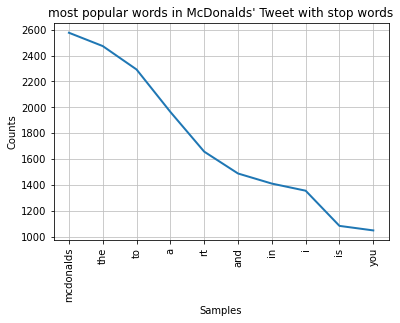

In [14]:
%matplotlib inline 
freq_mcd = nltk.FreqDist(words_mcd)
freq_mcd.plot(10, title= "most popular words in McDonalds' Tweet with stop words");

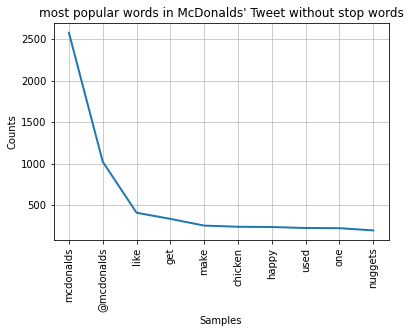

In [15]:
freq_mcd_woStopWords = nltk.FreqDist(words_mcd_woStopWords)
freq_mcd_woStopWords.plot(10, title="most popular words in McDonalds' Tweet without stop words");

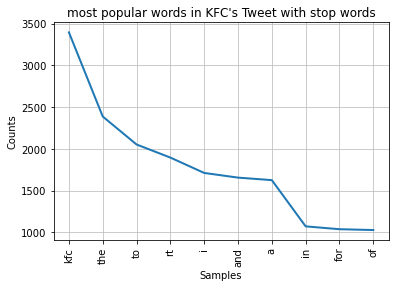

In [16]:
%matplotlib inline 

# get frequent words
freq_kfc = nltk.FreqDist(words_kfc)
freq_kfc.plot(10, title= "most popular words in KFC's Tweet with stop words");

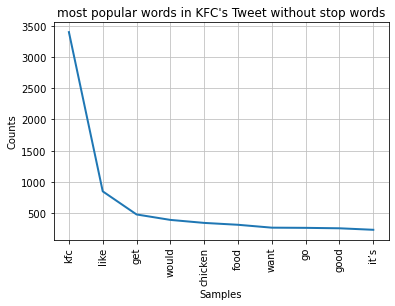

In [17]:
freq_kfc_woStopWords = nltk.FreqDist(words_kfc_woStopWords)
freq_kfc_woStopWords.plot(10, title= "most popular words in KFC's Tweet without stop words");

## Q2.	What are the ten most popular hashtags (#hashtag)?

In [18]:
c_hashtag_mcd = Counter([w for w in words_mcd if w.startswith('#') == True]) # list comprehension with str method "startswith" to set filter
print('McDonald 10 most popular hashtags')
pprint(c_hashtag_mcd.most_common(10))
print('')
c_hashtag_kfc = Counter([w for w in words_kfc if w.startswith('#') == True])
print('KFC 10 most popular hashtags')
pprint(c_hashtag_kfc.most_common(10))

McDonald 10 most popular hashtags
[('#mcdonalds', 109),
 ('#dreamteamfanart', 49),
 ('#dreamfanart', 49),
 ('#georgenotfoundfanart', 49),
 ('#sapnapfanart', 49),
 ('#mccafemotivation', 44),
 ('#ymornings', 38),
 ('#rctid', 22),
 ('#mcdonaldschickensandwich', 21),
 ('#crypto', 17)]

KFC 10 most popular hashtags
[('#kfc', 150),
 ('#gulfinmanila202…', 146),
 ('#gulfinmanila2022', 72),
 ('#princewilliam', 55),
 ('#princeofwales', 55),
 ('#pakvseng2022', 32),
 ('#colonelsogbirthday', 29),
 ('#oc_tober2022', 24),
 ('#food', 14),
 ('#jobs', 12)]


## Q3.	What are the ten most frequently mentioned usernames (@username)?

In [19]:
c_hashtag_mcd = Counter([w for w in words_mcd if w.startswith('@') == True]) # list comprehension with str method "startswith" to set filter
print('McDonald 10 most frequently mentioned usernames')
pprint(c_hashtag_mcd.most_common(10))
c_hashtag_kfc = Counter([w for w in words_kfc if w.startswith('@') == True])
print()
print('KFC 10 most frequently mentioned usernames')
pprint(c_hashtag_kfc.most_common(10))

McDonald 10 most frequently mentioned usernames
[('@mcdonalds', 1022),
 ('@thehealthb0t:', 162),
 ('@bonisile_rms:', 142),
 ('@marcellacomedy:', 92),
 ('@mcdonaldscanada', 66),
 ('@jeremycom', 54),
 ('@actingthegom:', 54),
 ('@d04_exe:', 49),
 ('@mcdonalds_sa', 42),
 ('@yfm', 36)]

KFC 10 most frequently mentioned usernames
[('@kfc_es', 201),
 ('@kfc', 192),
 ('@kfc_uki', 156),
 ('@98_josua:', 146),
 ('@phantomarcade3k:', 79),
 ('@gulfkeepersph:', 77),
 ('@headofmeduzaa:', 66),
 ('@happeehour', 65),
 ('@ash_candygulf:', 63),
 ('@kfc_ghana', 58)]


## Q4.	Which are the three most common sources of the tweets? 
A tweet’s source can be found in the “source” field in the tweet data.

In [20]:
print('McDonald 3 most common sources')
print(df_tweets_mcd['source'].value_counts()[:3])
print(' ')
print('KFC 3 most common sources')
print(df_tweets_kfc['source'].value_counts()[:3])

McDonald 3 most common sources
Twitter for iPhone     2145
Twitter for Android    1307
Twitter Web App         902
Name: source, dtype: int64
 
KFC 3 most common sources
Twitter for iPhone     1936
Twitter for Android    1913
Twitter Web App         796
Name: source, dtype: int64


## Q5.	Create a line chart to show the time trend of tweet counts (number of tweets in a day (or an hour or a minute) depending on the collected data).

In [21]:
df_tweets_mcd['created_at'] = pd.to_datetime(df_tweets_mcd['created_at']) # convert to pandas date time format
df_tweets_kfc['created_at'] = pd.to_datetime(df_tweets_kfc['created_at'])

Text(0.5, 0, 'Date, Hour')

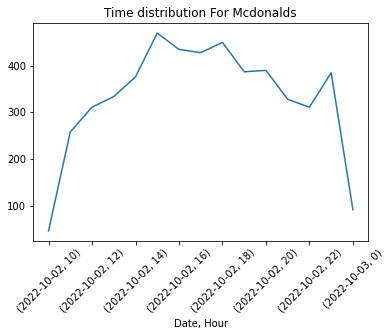

In [22]:
# use value_counts to count tweets number, set "date, hour" as index, and sort the index to draw the plot
ax_mcd = df_tweets_mcd.value_counts([df_tweets_mcd['created_at'].dt.date,df_tweets_mcd['created_at'].dt.hour]).sort_index().plot(rot=45, title="Time distribution For Mcdonalds")
ax_mcd.set_xlabel('Date, Hour')

Text(0.5, 0, 'Date, Hour')

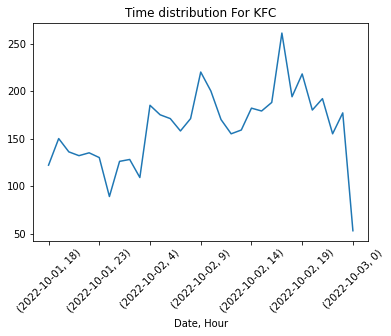

In [23]:
# use value_counts to count tweets number, set "date, hour" as index, and sort the index to draw the plot
ax_kfc = df_tweets_kfc.value_counts([df_tweets_kfc['created_at'].dt.date,df_tweets_kfc['created_at'].dt.hour]).sort_index().plot(rot=45, title="Time distribution For KFC")
ax_kfc.set_xlabel('Date, Hour')

## Q6.	Which are the three most influential tweets? 
A tweet’s influence score is the sum of “quote_count”, “reply_count”, “retweet_count”, “like_count”. These counts can be found in the “public_metrics” in the tweet data.

In [24]:
df_tweets_mcd['influential_score'] = pd.json_normalize(df_tweets_mcd['public_metrics']).sum(axis=1)
df_tweets_kfc['influential_score'] = pd.json_normalize(df_tweets_kfc['public_metrics']).sum(axis=1)

In [25]:
# Because the data has the same value of influential_score, we use drop_duplicates (with influential_score, text combination) 
# to make sure we won't fetch the same tweets 
print('McDonald 3 most influential tweets')
for i in df_tweets_mcd.sort_values('influential_score', ascending=False).drop_duplicates(subset=['influential_score','text']).head(3)['text']:
    print(i)
print()
print('KFC 3 most influential tweets')
for i in df_tweets_kfc.sort_values('influential_score', ascending=False).drop_duplicates(subset=['influential_score','text']).head(3)['text']:
    print(i)


McDonald 3 most influential tweets
RT @McDonalds: do u need a ride to the FFVII 25th anniversary party
RT @yosupjt: yo who tf installed doom on the mcdonalds kiosk 😭
RT @stanzipotenza: how good your McDonalds tastes depends on the state of your mental health

KFC 3 most influential tweets
RT @LilNasX: your employee just slapped me, called me a bottom, and refused to give me my change @kfc
RT @iNabber69: imagine having a family member brutally murdered, you have 10 years of therapy to cope and then one day you go onto youtube…
RT @DailyLoud: They said he got an interview at KFC today 👀🤣


## Q7.	Who are the three most vocal authors on the keyword? In other words, who are the most frequently tweeting authors in the tweet data? 

In [26]:
df_tweets_mcd.value_counts('author_id').head(3)

author_id
71026122               144
1470764537418862594     29
1551595368600797184     12
dtype: int64

In [27]:
three_most_freq_mcd = df_tweets_mcd.value_counts('author_id').head(3).index.tolist() # 3 most frequent tweet users
vocal_authors_mcd = pd.DataFrame()
for author in three_most_freq_mcd:
    vocal_authors_mcd = pd.concat([
        vocal_authors_mcd, 
        pd.json_normalize(tc.fetch_author_info(author)) # fetch their author information and add into "vocal_authors_mcd" variable
    ], ignore_index=True)
vocal_authors_mcd

Unauthorized: 401 Unauthorized
Unauthorized

In [27]:
df_tweets_kfc.value_counts('author_id').head(3)

author_id
121359088              16
1504272475227664387    13
1307389019777568768    12
dtype: int64

In [106]:
three_most_freq_kfc = df_tweets_kfc.value_counts('author_id').head(3).index.tolist() # 3 most frequent tweet users
vocal_authors_kfc = pd.DataFrame()
for author in three_most_freq_kfc:
    vocal_authors_kfc = pd.concat([
        vocal_authors_kfc, 
        pd.json_normalize(tc.fetch_author_info(author)) # fetch their author information and add into "vocal_authors_mcd" variable
    ], ignore_index=True)
vocal_authors_kfc

,description,verified,name,created_at,location,id,username,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count
0,Welcome to KFC South Africa’s Official Twitter...,True,KFC South Africa,2010-03-09T07:33:53.000Z,South Africa,121359088,KFCSA,288285,18699,52001,247
1,inspired by @TheAnything_Bot - owned by @noooo...,False,StuffBot,2022-03-17T01:44:52.000Z,NaN,1504272475227664387,StuffBotlmao,33,5,29209,0
2,we like news and other cool fun time stuff and...,False,totes real D 3D news and headline bot not fake...,2020-09-19T18:40:50.000Z,NaN,1307389019777568768,Totes3d,14,0,106717,2


## Q8.	Who are the three most influential authors? 
A user’s influence score is the sum of “followers_count”, “following_count”, “listed_count”. “tweet_count” in the author data.

In [28]:
# Remove duplicated author ID info
author_mcd_lst = author_mcd_lst.drop_duplicates(subset='id'); print(f'Lenght of Mcdonal tweets Author:{len(author_mcd_lst)}')
author_kfc_lst = author_kfc_lst.drop_duplicates(subset='id'); print(f'Lenght of KFC tweets Author:{len(author_kfc_lst)}')

Lenght of Mcdonal tweets Author:4390
Lenght of KFC tweets Author:4373


In [29]:
# Calculate the influential score
author_mcd_lst.loc[:,'influential score'] = author_mcd_lst[['public_metrics.followers_count','public_metrics.following_count', 
'public_metrics.tweet_count','public_metrics.listed_count']].sum(axis=1).values
author_kfc_lst.loc[:,'influential score'] = author_kfc_lst[['public_metrics.followers_count','public_metrics.following_count', 
'public_metrics.tweet_count','public_metrics.listed_count']].sum(axis=1).values

In [30]:
print('The 3 most influential authors of McDonalds are shown below:')
author_mcd_lst.sort_values(by='influential score', ascending=False).head(3)

The 3 most influential authors of McDonalds are shown below:


,description,verified,name,username,location,id,created_at,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,influential score
36,we ❤️ 2 c u ::)\norder ur cactus plant flea ...,True,McDonald's,McDonalds,None,71026122,1970-01-01 00:20:51.913603+00:00,4670007,13695,849092,9360,5542154
3253,The Fastest Crime News Updates on the Planet!,False,PulpNews Crime,PulpNews,USA,100986964,1970-01-01 00:21:02.356340+00:00,5437,913,4137370,1006,4144726
1851,Locked in. | En español: @MLSes,True,Major League Soccer,MLS,U.S. and Canada,107146095,1970-01-01 00:21:04.095740+00:00,3353293,9635,181695,8936,3553559


In [31]:
print('The 3 most influential authors of KFC are shown below:')
author_kfc_lst.sort_values(by='influential score', ascending=False).head(3)

The 3 most influential authors of KFC are shown below:


,description,created_at,username,name,id,verified,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,location,withheld.country_codes,influential score
1333,"Brb, taking quizzes 📈 some links may be affili...",1970-01-01 00:19:38.055603+00:00,BuzzFeed,BuzzFeed,5695632,True,6301724,2922,320783,21085,New York,None,6646514
6449,#GPOSERS is a #FFXIV community dedicated to co...,2018-07-30 12:47:28+00:00,GPOSERS_FFXIV,GPOSERS,1023912962002771968,False,18765,2534,1869371,68,Eorzea & Beyond,None,1890738
4669,"Hey, I'm a friendly robot trying to help share...",2014-09-26 11:28:41+00:00,AnimatorsPal,Animators Pal,2785259025,False,24671,17484,1473066,2475,Berlin,None,1517696


# <font color='red'>[Part 3]</font> Word Cloud!

In [32]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
text_mcd = '' # our string accumulator
for word in words_mcd_woStopWords:
    if len(word) == 1 or word in stopwords:
        continue
    text_mcd = text_mcd + ' ' + wnl.lemmatize(word) #lemmatize for returning the base or dictionary form of a word 

text_kfc = '' # our string accumulator
for word in words_kfc_woStopWords:
    if len(word) == 1 or word in stopwords:
        continue
    text_kfc = text_kfc + ' ' + wnl.lemmatize(word)

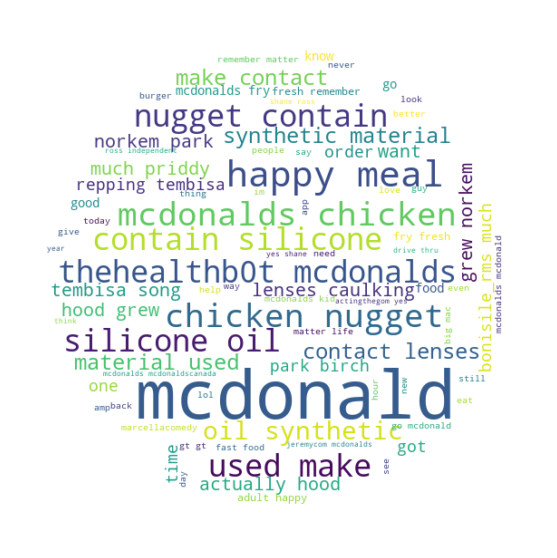

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = text_mcd
# makes the circle using numpy
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
# Generate a word cloud of document
wordcloud = WordCloud(width=800, height=800,background_color="white",
 mask=mask, contour_width=0.1, contour_color="white", min_word_length=2, scale=2)
wordcloud.generate(text)
plt.figure( figsize=(20,10) )
#Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
#https://pythonsansar.com/how-create-word-cloud-python/

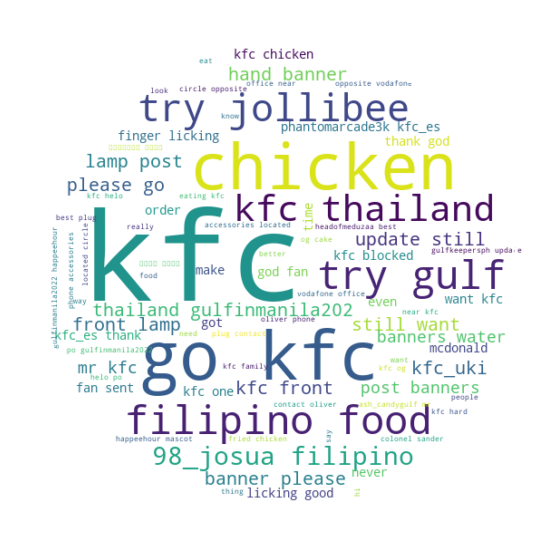

In [34]:
text = text_kfc
# makes the circle using numpy
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
# Generate a word cloud of document
wordcloud = WordCloud(width=800, height=800,background_color="white",
 mask=mask, contour_width=0.1, contour_color="white", min_word_length=2, scale=2)
wordcloud.generate(text)
plt.figure( figsize=(20,10) )
#Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
#https://pythonsansar.com/how-create-word-cloud-python/

# <font color='red'>[Part 4]</font> Sentiment Analysis!

## Q1.	What are the average polarity and subjectivity scores?

In [35]:
content_mcd  = ' '.join(words_mcd)
tb_mcd = TextBlob(content_mcd)
sentences_mcd = tb_mcd.sentences

print(len(sentences_mcd))

content_kfc  = ' '.join(words_kfc)
tb_kfc = TextBlob(content_kfc)
sentences_kfc = tb_kfc.sentences

print(len(sentences_kfc))

3682
3844


In [36]:
sub_list_mcd = []
pol_list_mcd = []
sub_list_kfc = []
pol_list_kfc = []

for s in sentences_mcd:
    tb_mcd = TextBlob(str(s))
    sub_list_mcd.append(tb_mcd.sentiment.subjectivity)
    pol_list_mcd.append(tb_mcd.sentiment.polarity)


for s in sentences_kfc:
    tb_kfc = TextBlob(str(s))
    sub_list_kfc.append(tb_kfc.sentiment.subjectivity)
    pol_list_kfc.append(tb_kfc.sentiment.polarity)

In [37]:
print('The average subjectivity score of McDonalds:',round(pd.Series(sub_list_mcd).mean(),ndigits=3)) # opinion 
print('The average polarity score of McDonalds:',round(pd.Series(pol_list_mcd).mean(),ndigits=3)) # positive or negative emotion
print()
print('The average subjectivity score of KFC:',round(pd.Series(sub_list_kfc).mean(),ndigits=3)) # opinion 
print('The average polarity score of KFC:',round(pd.Series(pol_list_kfc).mean(),ndigits=3)) # positive or negative emotion

The average subjectivity score of McDonalds: 0.36
The average polarity score of McDonalds: 0.082

The average subjectivity score of KFC: 0.368
The average polarity score of KFC: 0.027



## Q2.	Visualize the polarity and subjectivity score distributions using histograms, where X-axis is the score and Y-axis is the tweet count in the score bin. In total, there should be 2 histograms for this task.

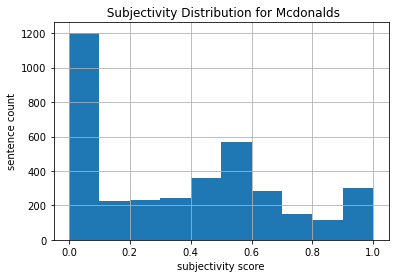

In [38]:
plt.hist(sub_list_mcd, bins=10,) #, normed=1, alpha=0.75)

plt.title(" Subjectivity Distribution for Mcdonalds")
plt.xlabel('subjectivity score')
plt.ylabel('sentence count')
plt.grid(True)
# plt.savefig('Subjectivity Distribution for Mcdonalds.pdf')
plt.show()

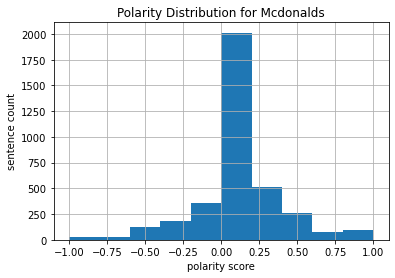

In [39]:
plt.hist(pol_list_mcd, bins=10) #, normed=1, alpha=0.75)
plt.title("Polarity Distribution for Mcdonalds")
plt.xlabel('polarity score')
plt.ylabel('sentence count')
plt.grid(True)
# plt.savefig('Polarity Distribution for Mcdonalds.pdf')
plt.show()

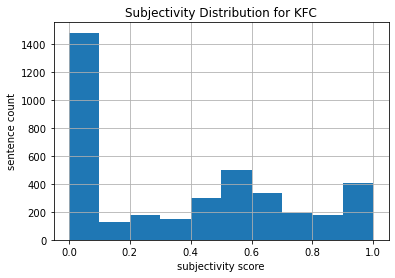

In [40]:
plt.hist(sub_list_kfc, bins=10) #, normed=1, alpha=0.75)

plt.title("Subjectivity Distribution for KFC")
plt.xlabel('subjectivity score')
plt.ylabel('sentence count')
plt.grid(True)
# plt.savefig('Subjectivity Distribution for KFC.pdf')
plt.show()

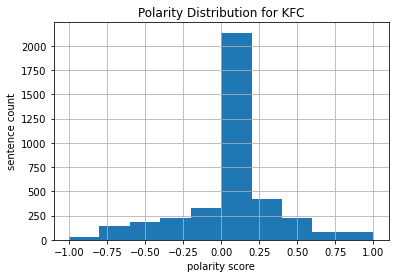

In [41]:
plt.hist(pol_list_kfc, bins=10) #, normed=1, alpha=0.75)
plt.title("Polarity Distribution for KFC")
plt.xlabel('polarity score')
plt.ylabel('sentence count')
plt.grid(True)
# plt.savefig('Polarity Distribution for KFC.pdf')
plt.show()

## Q3.	Based on the polarity scores, what are the most positive and negative tweets on the keyword? Why is the author happy/angry on the topic? If there are multiple tweets with same sentiment scores, please pick 2-3 tweets among them.

In [42]:
pos_sentences_mcd =[]
neg_sentences_mcd =[]
pos_sentences_kfc =[]
neg_sentences_kfc =[]

# Because there are lots of tweets with highest/ lowest score, we only pick 3 sentences with max/min scores.

for ind, v in enumerate(pol_list_mcd):
    if v == max(pol_list_mcd): pos_sentences_mcd.append(sentences_mcd[ind])
    if v == min(pol_list_mcd): neg_sentences_mcd.append(sentences_mcd[ind])

for ind, v in enumerate(pol_list_kfc):
    if v == max(pol_list_kfc): pos_sentences_kfc.append(sentences_kfc[ind])
    if v == min(pol_list_kfc): neg_sentences_kfc.append(sentences_kfc[ind])

In [43]:
pprint(pos_sentences_mcd[:3])
pprint(pos_sentences_kfc[:3])

[Sentence("woman sues mcdonald’s for $13 million after accusing staff of serving coffee containing chemicals • hollywood unlocked and it was awesome!"),
 Sentence("hit us up with more info on this here: rt @angrycrazyzebra: lets goooo!!!!"),
 Sentence("rt @casmz5: 🚨🚨new video🚨🚨 👇👇👇👇👇👇👇 🔗- 🔗- the best two things in a frappe.")]
[Sentence("@chikn_kfc good times!!"),
 Sentence("it was delicious."),
 Sentence("good morning!!")]


In [44]:
pprint(neg_sentences_mcd[:3])
pprint(neg_sentences_kfc[:3])

[Sentence("absolutely disgusting!!"),
 Sentence("don’t know why but it’s terrible that it does that."),
 Sentence("— ali francis (@apwf… rt @femaieboyfriend: got she'd at mcdonalds but then the cashier said 'oh my bad' rt @ianlovesfilm: bruh i came to mcdonalds specifically for the cars toys and i got lebron james?.!.?!:!;?")]
[Sentence("subway is nasty."),
 Sentence("starbucks coffee tastes nasty af."),
 Sentence("you know that if i did order it, it would be disgusting.")]
